# Data Prep for CPS: Robotics
Nathan Butler  |  nlbutler@iastate.edu

Following are some instructions for all the theme groups.
1. The final code must be pushed to git before the deadline.
2. Use the discussion board in Canvas in case of any issue.

If the group has technical questions related to the homework, don’t hesitate to get in touch with Ryan (hjy@iastate.edu)

----
In robotics application, we often have to pre-process the input images being used by a robot to improve the learning capabilities of the robot. We will explore a few examples of such pre-processing techniques in this assignment.

We will use the Grasping Dataset available at  https://www.kaggle.com/oneoneliu/cornell-grasp to pre-process images so that a robot arm can learn to detect and grasp an object.

The dataset contains raw images of the objects, coordinates and labels of grasping rectangles as well as point cloud data of the objects. 

# Part 1
Download the dataset and overlay the positive and negative grasping rectangles for each image on the raw image using the coordinates of the rectangles provided.

In [31]:
#Generated by ChatGPT:

# Imports
import os
import urllib.request
import zipfile
import numpy as np

# Toggle download of dataset (only run once, then set to False)
download = False

if download:
    # Download dataset from Kaggle
    url = 'https://www.kaggle.com/oneoneliu/cornell-grasp'
    os.environ['KAGGLE_USERNAME'] = 'nathanbutler001'
    os.environ['KAGGLE_KEY'] = '6fe5bd3a95947b3bfdcfb6f0183217e7'
    !kaggle datasets download -d oneoneliu/cornell-grasp
    with zipfile.ZipFile('cornell-grasp.zip', 'r') as zip_ref:
        # Automatically extracted to same level, must be manually placed in
        # ./data/cornell_grasp
        zip_ref.extractall()

# Load dataset
dataset_path = './data/cornell_grasp'
image_paths = []
for i in range(1, 11):
    # Define folder path by joining 01 through 10 to dataset_path
    folder_path = os.path.join(dataset_path, f'{i:02d}')
    names = os.listdir(folder_path)
    # Fill list containing all png image filepaths
    for name in names:
        if name.endswith('r.png'):
            image_path = os.path.join(folder_path, name)
            image_paths.append(image_path)

In [50]:
import cv2
import matplotlib.pyplot as plt

overlayed_images = []

# Overlay images with grasping rectangles
for image_path in image_paths:
    # print(image_path)
    # Load image
    image = cv2.imread(image_path)
    
    # Load positive grasping rectangle
    pos_rect_path = image_path.replace('r.png', 'cpos.txt')
    try:
        pos_rects = np.loadtxt(pos_rect_path)
    except UserWarning:
        pass
    pos_rects = pos_rects.astype(int)
    pos_rects_coords = [[[a[0], a[1]], [b[0], b[1]], [c[0], c[1]], [d[0], d[1]]] 
                        for a, b, c, d in zip(pos_rects[::4], pos_rects[1::4], pos_rects[2::4], pos_rects[3::4])]
    pos_rects_coords = np.array(pos_rects_coords, np.int32)
    
    # Load negative grasping rectangles
    neg_rect_path = image_path.replace('r.png', 'cneg.txt')
    try:
        neg_rects = np.loadtxt(neg_rect_path)
    except UserWarning:
        pass
    neg_rects = neg_rects.astype(int)
    neg_rects_coords = [[[a[0], a[1]], [b[0], b[1]], [c[0], c[1]], [d[0], d[1]]] 
                        for a, b, c, d in zip(neg_rects[::4], neg_rects[1::4], neg_rects[2::4], neg_rects[3::4])]
    neg_rects_coords = np.array(neg_rects_coords, np.int32)
    
    # Overlay grasping rectangles on image
    image_copy = image.copy()
    for rect in pos_rects_coords:
        cv2.polylines(image_copy, [rect], True, (0, 255, 0), thickness=1)
    for rect in neg_rects_coords:
        cv2.polylines(image_copy, [rect], True, (0, 0, 255), thickness=1)
    
    overlayed_images.append(image_copy)

# UserWarning is probably printed because pcd0154cneg.txt is empty. This makes me sad, but everything still 
# seems to work.

/tmp/ipykernel_5146/3798101816.py:26: UserWarning: loadtxt: Empty input file: "./data/cornell_grasp/01/pcd0154cneg.txt"
  neg_rects = np.loadtxt(neg_rect_path)


./data/cornell_grasp/01/pcd0154r.png


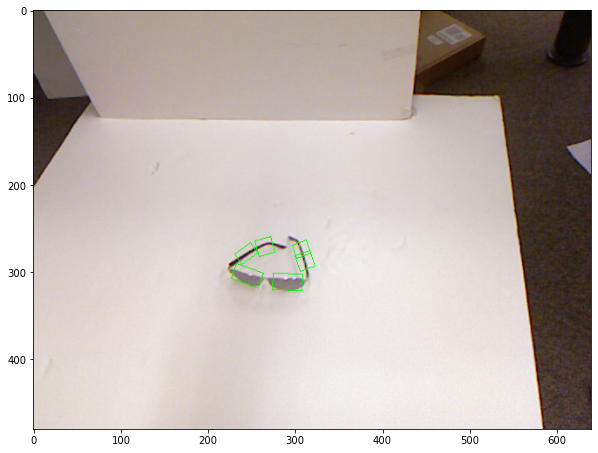

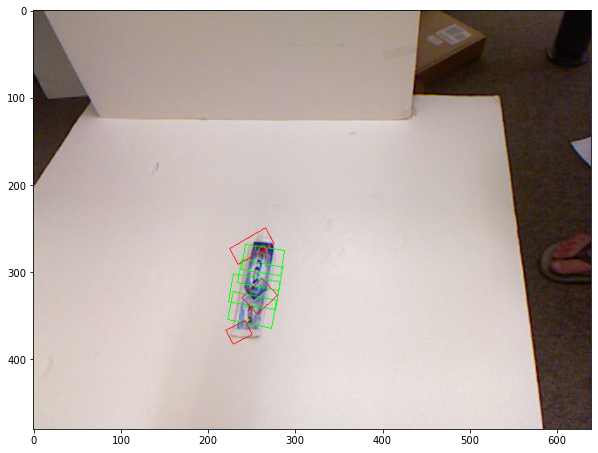

In [52]:
import random

# Display Random image
idx = random.randint(1,len(overlayed_images))

img = overlayed_images[idx]

print(image_paths[idx])    
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# For reference, display image 1
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(overlayed_images[0], cv2.COLOR_BGR2RGB))
plt.show()